In [21]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy as sp
import seaborn as sns
import matplotlib as mpl

In [24]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

In [6]:
from scipy import stats

## 이차판별분석법

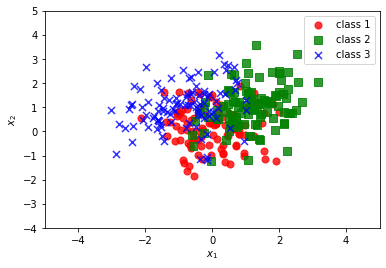

In [7]:
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])  #다변수정규분포 생성
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)

X1 = rv1.rvs(N)    # 랜덤 샘플 생성
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)

y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)

X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [10]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [11]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [12]:
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [13]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [14]:
qda.covariance_[2]

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

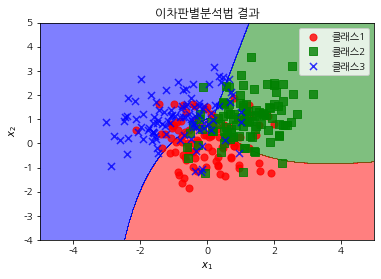

In [25]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                      np.arange(x1min, x1max, (x1max-x1min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(['r', 'g', 'b']).as_hex())

plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker='o', color='r', label='클래스1')
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker='s', color='g', label='클래스2')
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker='x', color='b', label='클래스3')
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('이차판별분석법 결과')
plt.legend()
plt.show()

## 연습문제 1  

- 이차판별분석법을 사용하여 붓꽃 분류문제를 풀고 성능을 분류결과표와 분류보고서를 출력하라. 그리고 각 클래스에 대한 ROC 커브를 그려라.

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
X1 = iris.data
y1 = iris.target

model1 = QuadraticDiscriminantAnalysis().fit(X1, y1)
y1_pred = model1.predict(X1)

from sklearn.metrics import confusion_matrix

confusion_matrix(y1, y1_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y1, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



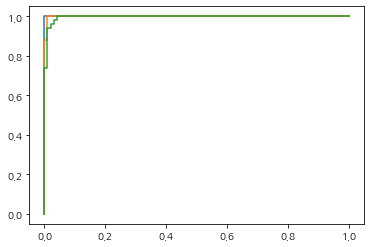

In [37]:
from sklearn.preprocessing import label_binarize

y1_vec = label_binarize(y1,classes=[0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    model = QuadraticDiscriminantAnalysis().fit(X1, y1_vec[:, i])
    fpr, tpr, thr = roc_curve(y1_vec[:, i], model.predict_proba(X1)[:, 1])
    plt.plot(fpr, tpr)

plt.show()

## 선형판별분석

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2, solver="svd", store_covariance=True).fit(X, y)

In [45]:
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [46]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

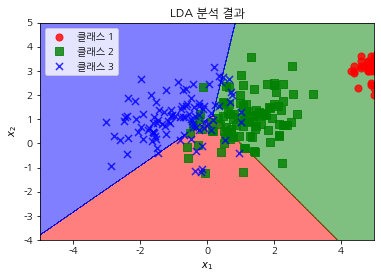

In [48]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                      np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("LDA 분석 결과")
plt.show()

## 연습 문제 2
- 선형판별분석법을 사용하여 붓꽃 분류문제를 풀고 성능을 분류결과표와 분류보고서를 출력하라. 그리고 각 클래스에 대한 ROC 커브를 그려라.

In [51]:
from sklearn.datasets import load_iris
iris = load_iris()
X2 = iris.data
y2 = iris.target

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis().fit(X2, y2)
y2_pred = model.predict(X2)

from sklearn.metrics import confusion_matrix

confusion_matrix(y2, y2_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y2, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



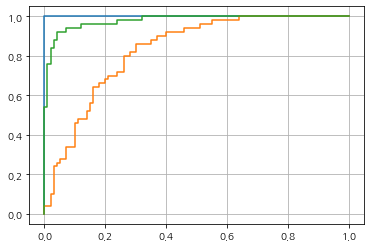

In [55]:
from sklearn.preprocessing import label_binarize

y2_vec = label_binarize(y2, classes= [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    model = LinearDiscriminantAnalysis().fit(X2, y2_vec[:, i])
    fpr, tpr, thr = roc_curve(y2_vec[:, i], model.predict_proba(X2)[:, 1])
    plt.plot(fpr, tpr)
    plt.grid(True)

plt.show()


In [ ]:
ㅁㅁ